In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


# **DATA ANALYSIS**

In [2]:
data = pd.read_csv("/Users/suhelkhan/Mentorness/Salary/Salary Prediction of Data Professions.csv")
data.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [3]:
data["CURRENT DATE"].nunique()

1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


In [5]:
data["DESIGNATION"].nunique()

6

In [6]:
data["UNIT"].nunique()

6

In [7]:
designation = ['Analyst', 'Associate', 'Senior Analyst', 'Senior Manager', 'Manager', 'Director']

In [8]:
unit = ['Finance', 'Web', 'IT', 'Operations', 'Marketing', 'Management']

## Analyzing how salary varies of employers of different departments in different units

In [9]:
def analysis_dep(designation):
    for desi in designation:
            fig = plt.figure(figsize =(7, 4))
            plt.title(f"Average Salary of {str(desi)} of different UNITS")
            a = data[data["DESIGNATION"]==desi]
            mean = a.groupby(["UNIT"])[["SALARY"]].mean().reset_index()
            plt.ylabel("SALARY")
            plt.plot(mean["UNIT"] , mean["SALARY"])

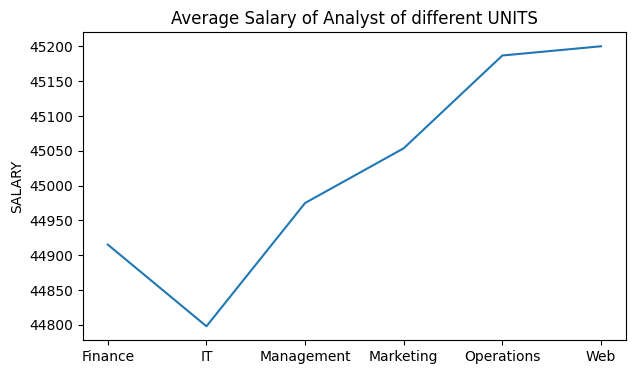

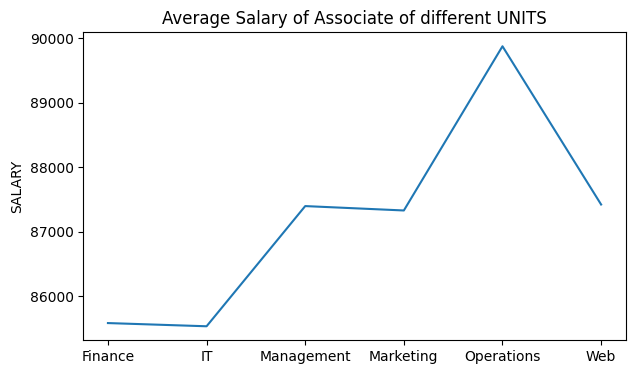

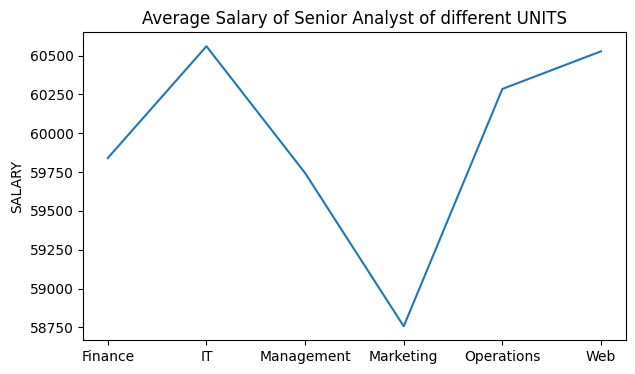

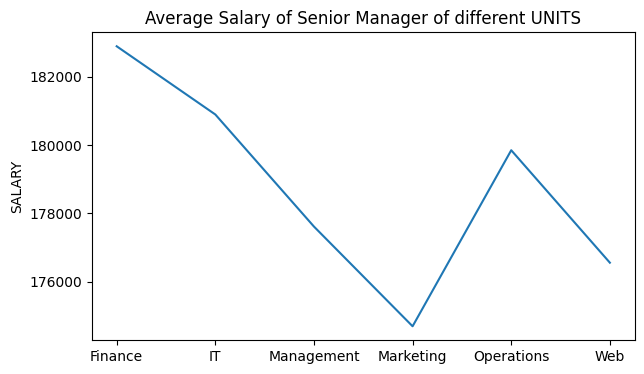

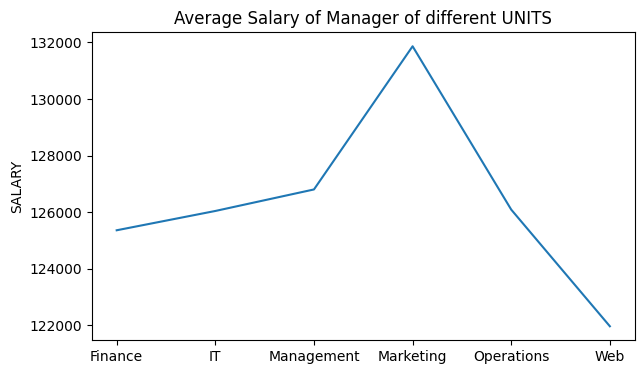

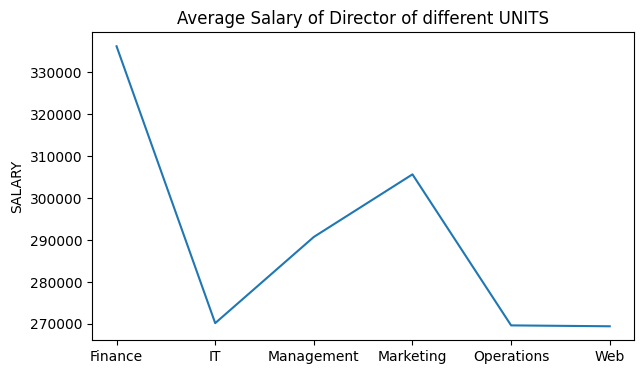

In [10]:
analysis_dep(designation)

**1) We can see that the average salary of Analyst in Web UNIT is highest , and it is least in IT UNIT .<br>
2) Average salary of Associate is maximum in Operations UNIT and least in IT UNIT .<br>
3) Average salary of Senior Analyst is maximum in IT UNIT and least in Marketing UNIT .<br>
4) Average salary of Senior Manager is maximum in Finance UNIT and least in Marketing UNIT .<br>
5) Average salary of Manager is maximum in Marketing UNIT and least in Web UNIT .<br>
6) Average salary of Director is maximum in Finance UNIT and least in Web UNIT .**

## Analyzing , is there any gender descrimination in SALARY ?

In [11]:
d = data[data["DESIGNATION"]=="Analyst"]
u = d[d["UNIT"]=="Finance"]
mean = u.groupby(["SEX"])[["SALARY"]].mean().reset_index()
mean.head()

,SEX,SALARY
0,F,44954.627907
1,M,44868.821918


In [12]:
def gender_an(designation , unit):
    for desi in designation:
        for un in unit:
                d = data[data["DESIGNATION"]==desi]
                u = d[d["UNIT"]== un]
                fig = plt.figure(figsize=(2,2))
                mean = u.groupby(["SEX"])[["SALARY"]].mean()
                plt.title(f"{str(desi)} in {str(un)}")
                plt.plot(mean)
                plt.show()

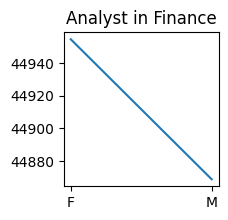

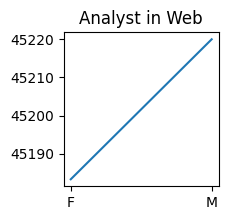

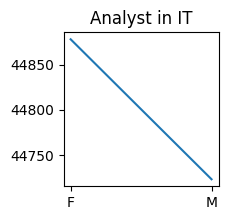

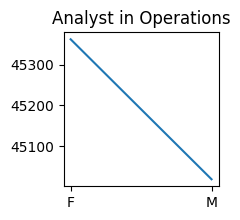

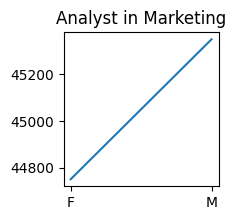

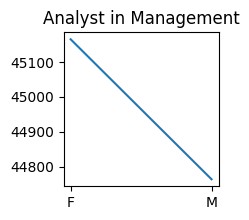

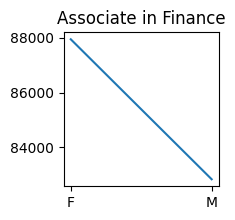

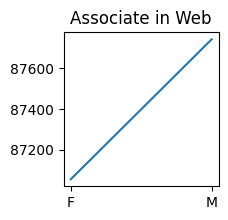

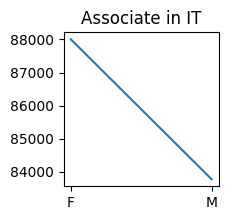

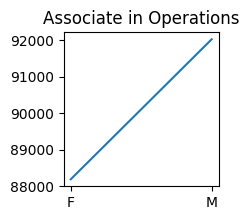

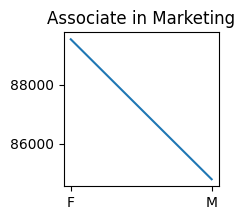

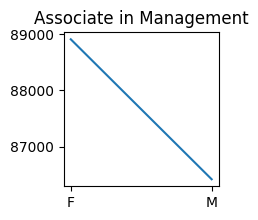

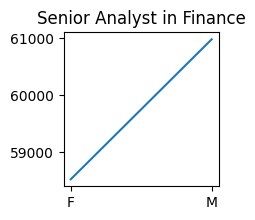

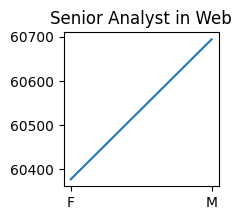

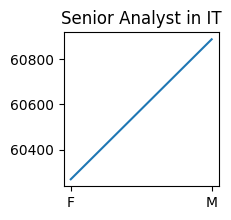

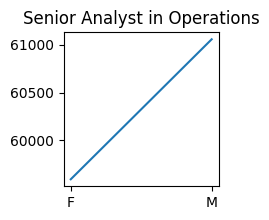

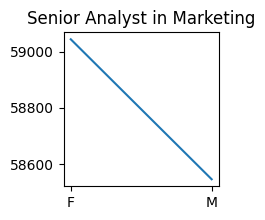

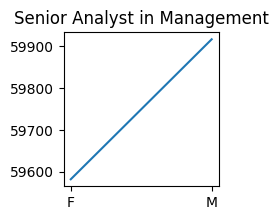

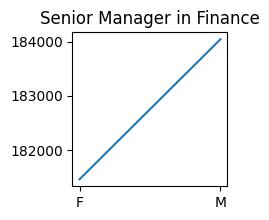

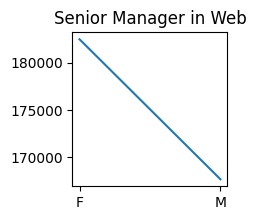

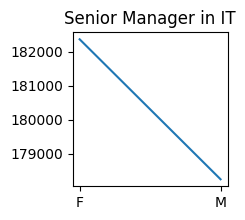

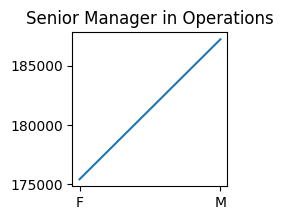

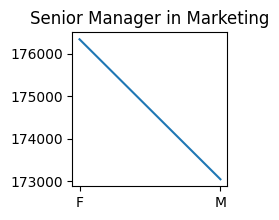

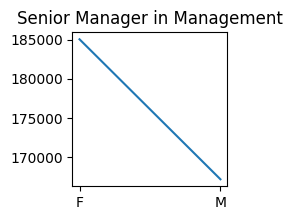

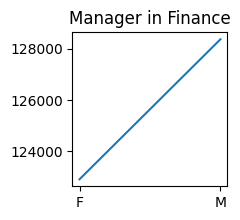

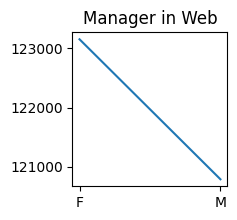

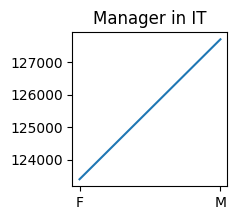

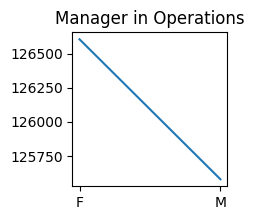

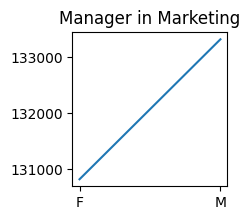

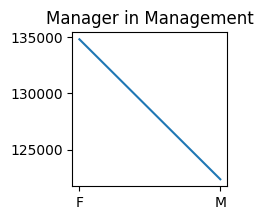

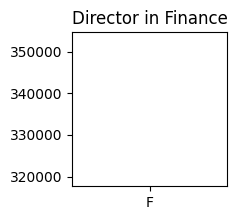

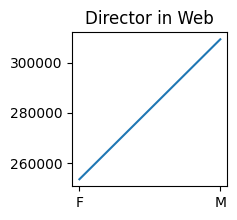

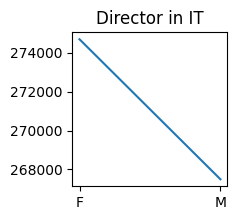

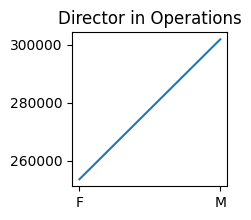

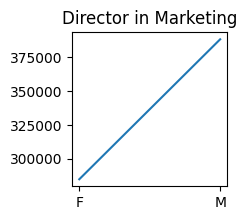

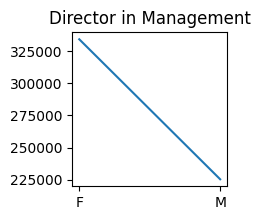

In [13]:
gender_an(designation , unit)

## **KEY FINDINGS**
**1) There is not much differnce in salaries of MALE and FEMALE Analyst in different units.<br>
2) For Associates , there is discrimination between salaries of MALE and FEMALE employees.<br>
-> MALE Associates are paid less in Fianance , Management and IT UNIT.<br>
-> FEMALE Associates are paid less in Operations UNIT.<br>
3) For Senior Analyst , there is gender discrimination in Salaries of MALE and FEMALE employees in Fianance UNIT.<br>
4) For Senior Manager , there is gender discrimination in Salaries of MALE and FEMALE employees in Fianance , Web , Operations and Management UNIT.<br>
5)For Manager , there is gender discrimination in Salaries of MALE and FEMALE employees in Fianance , IT and Management UNIT.<br>
6) For Director , there is gender discrimination in Salaries of MALE and FEMALE employees in Web , IT , Operations , Marketting and Management UNIT.<br>**

## Analysis of change in Salary with Age of Employee .

In [14]:
def age_an(designation , unit):
    for desi in designation:
        for un in unit:
                d = data[data["DESIGNATION"]==desi]
                u = d[d["UNIT"]== un]
                fig = plt.figure(figsize=(2,2))
                mean = u.groupby(["AGE"])[["SALARY"]].mean()
                plt.title(f"{str(desi)} in {str(un)}")
                plt.xlabel("AGE")
                plt.ylabel("SALARY")
                plt.plot(mean)
                plt.show()

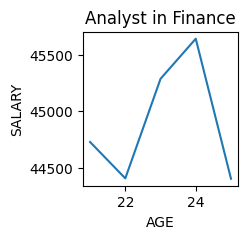

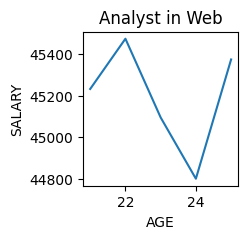

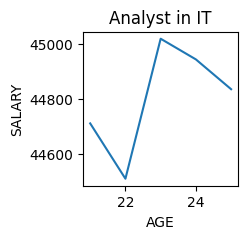

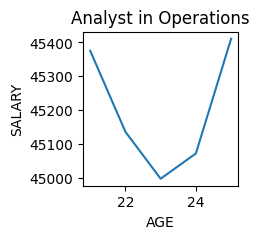

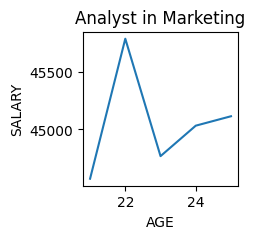

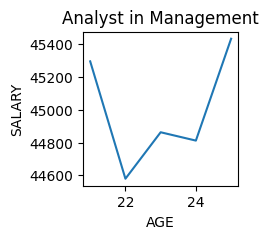

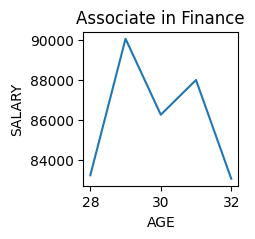

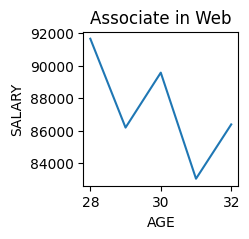

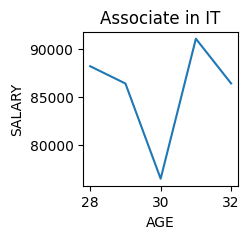

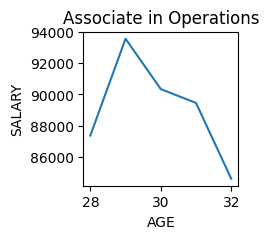

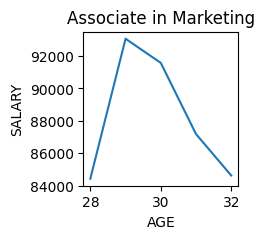

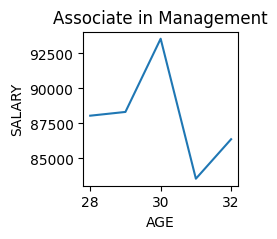

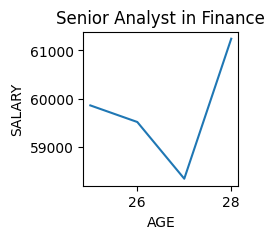

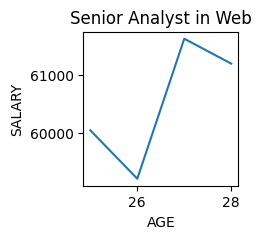

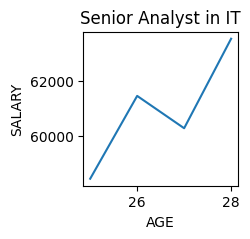

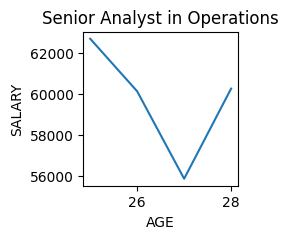

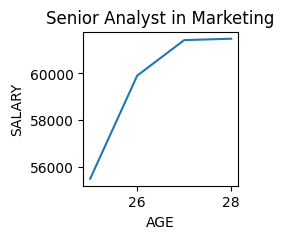

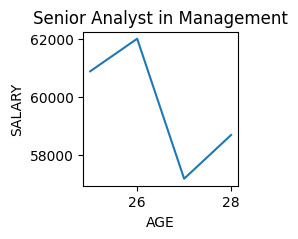

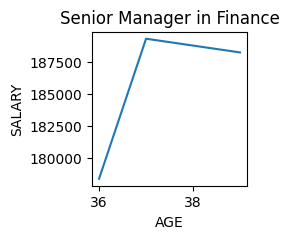

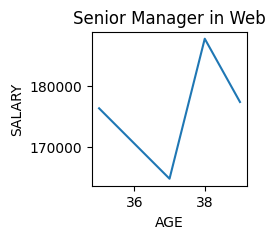

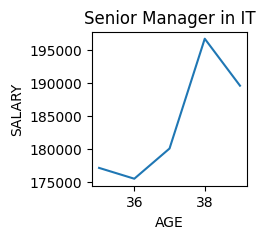

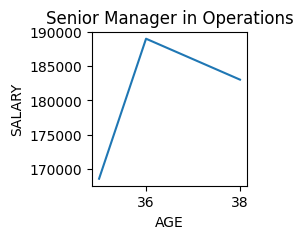

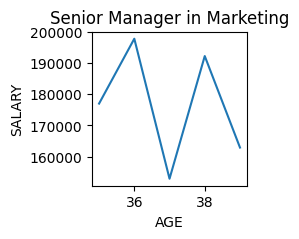

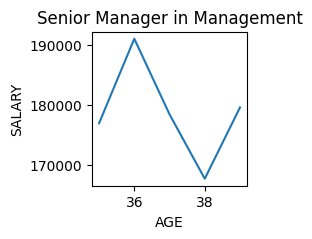

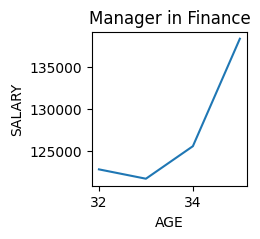

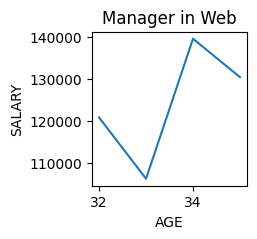

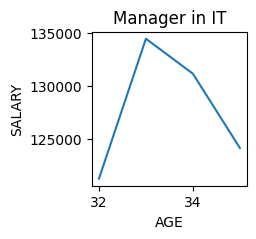

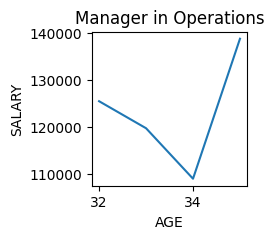

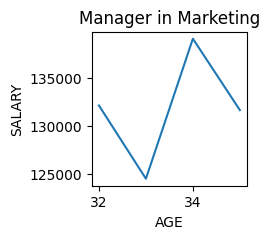

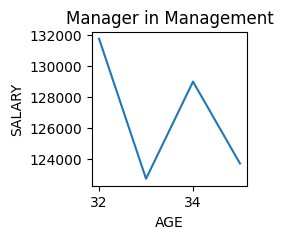

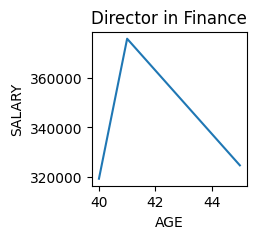

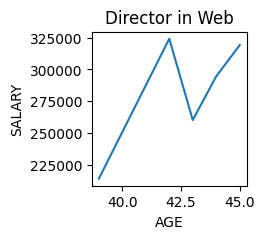

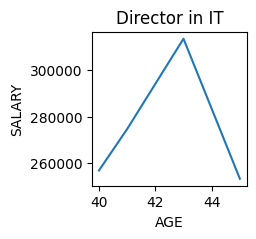

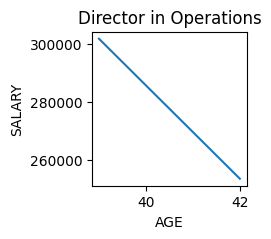

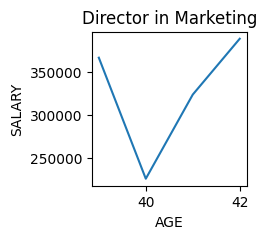

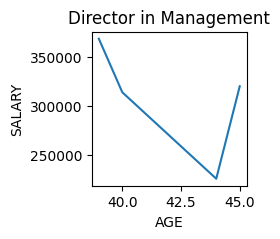

In [15]:
age_an(designation , unit)

**There is not a gradual change in Salaries of employees with change in their Age .** 

## Analyzing change in salaries of employees with change in years of experiance they have

In [16]:
def exp_an(designation , unit):
    for desi in designation:
        for un in unit:
                d = data[data["DESIGNATION"]==desi]
                u = d[d["UNIT"]== un]
                fig = plt.figure(figsize=(2,2))
                mean = u.groupby(["PAST EXP"])[["SALARY"]].mean()
                plt.title(f"{str(desi)} in {str(un)}")
                plt.xlabel("PAST EXPERIANCE")
                plt.ylabel("SALARY")
                plt.plot(mean)
                plt.show()

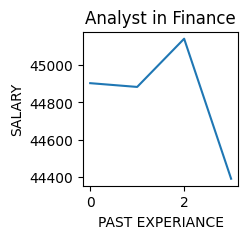

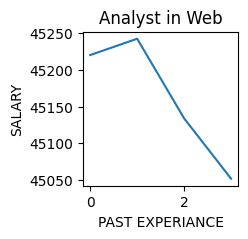

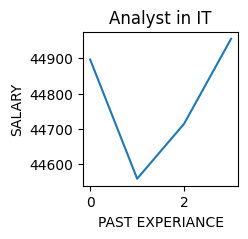

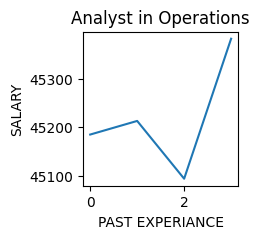

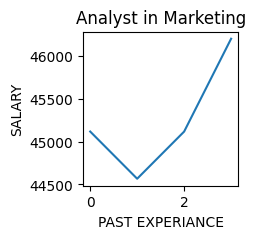

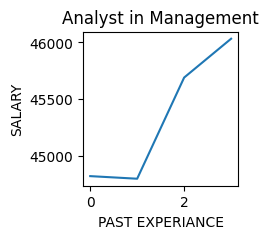

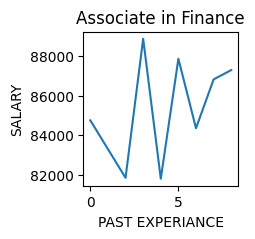

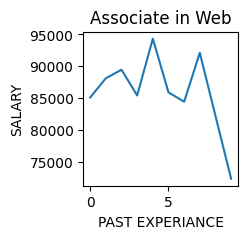

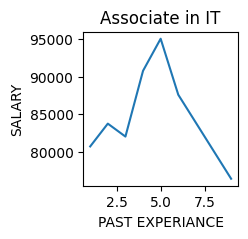

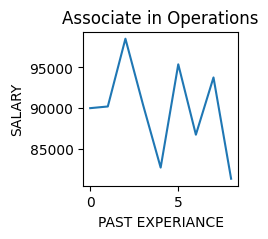

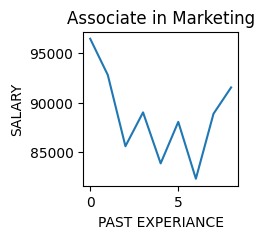

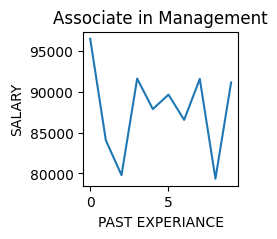

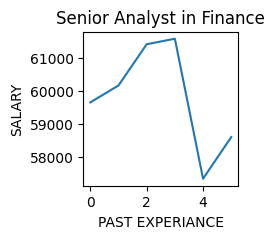

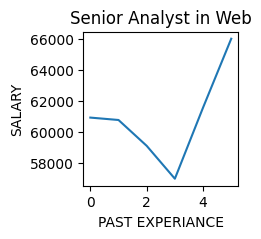

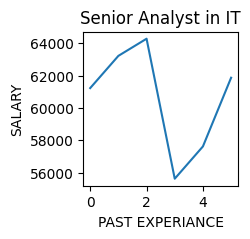

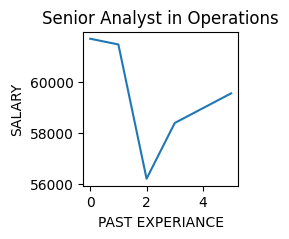

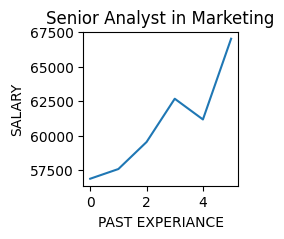

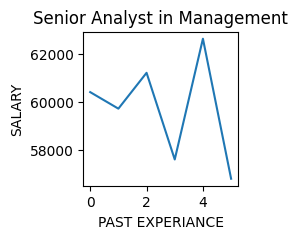

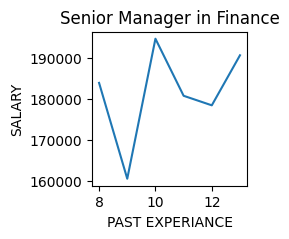

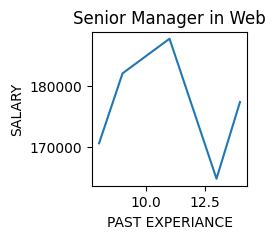

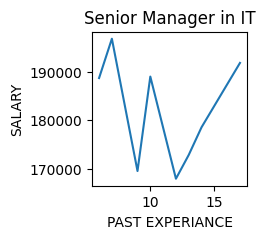

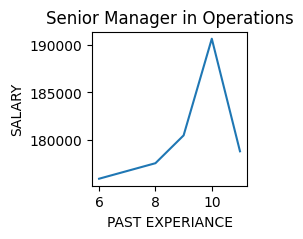

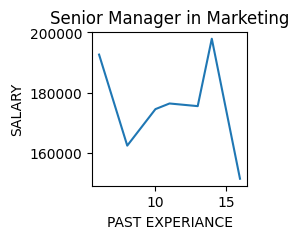

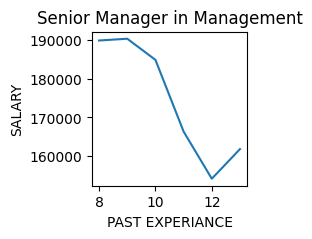

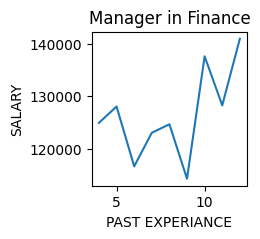

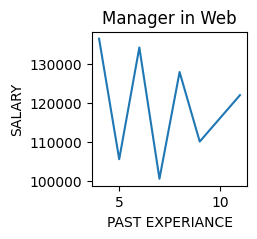

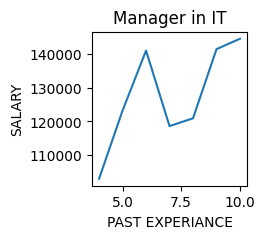

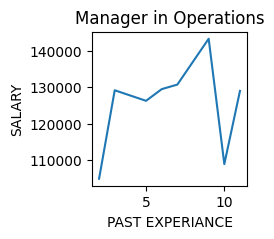

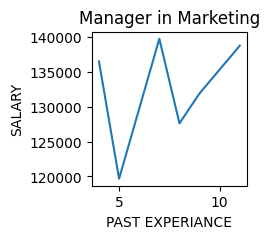

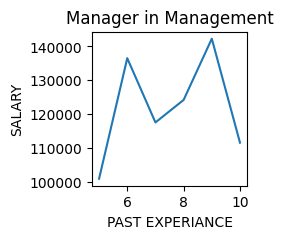

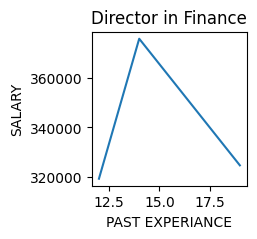

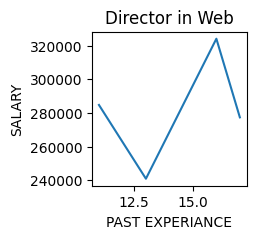

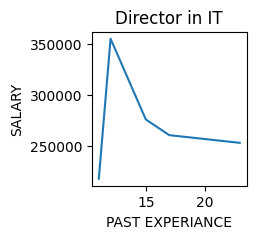

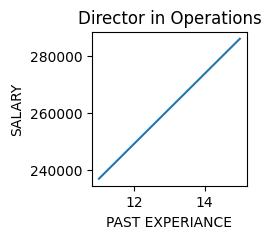

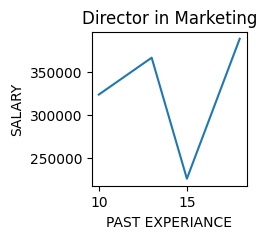

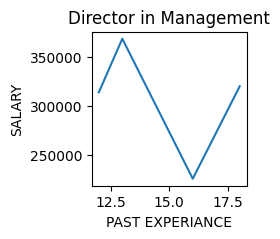

In [17]:
exp_an(designation , unit)

**Here also we can see that there is not a gradual increase in salaries of employees with increase in PAST EXPERIANCE they have.<br>
-> But in some departments like Director in Operations UNIT there is a linear increase in salary with increase in Past Experiance.**

## Analyzing change in salaries of employees with change in RATINGS they have

In [18]:
def rating_an(designation , unit):
    for desi in designation:
        for un in unit:
                d = data[data["DESIGNATION"]==desi]
                u = d[d["UNIT"]== un]
                fig = plt.figure(figsize=(2,2))
                mean = u.groupby(["RATINGS"])[["SALARY"]].mean()
                plt.title(f"{str(desi)} in {str(un)}")
                plt.xlabel("RATINGS")
                plt.ylabel("SALARY")
                plt.plot(mean)
                plt.show()

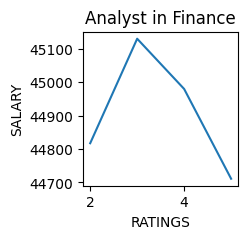

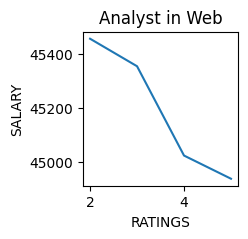

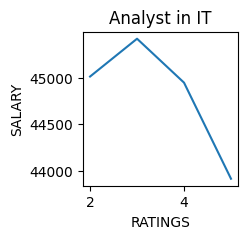

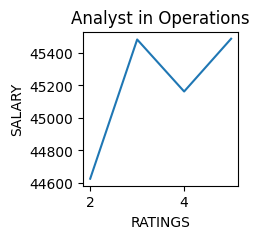

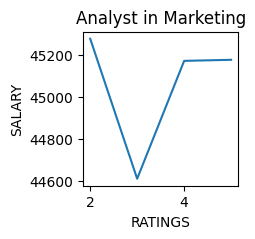

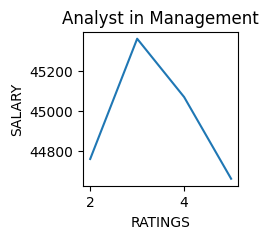

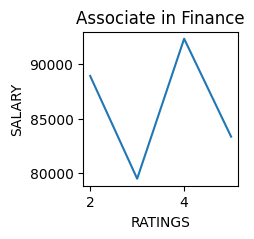

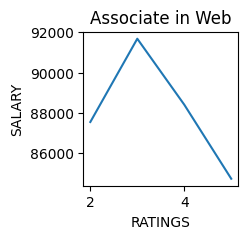

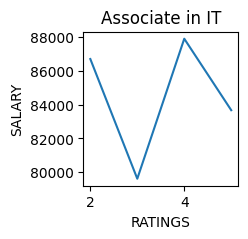

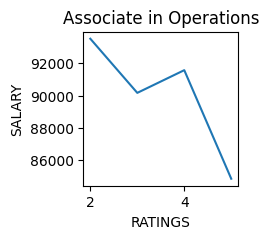

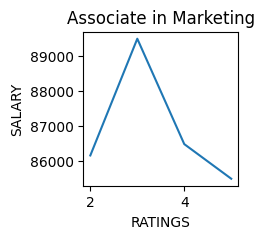

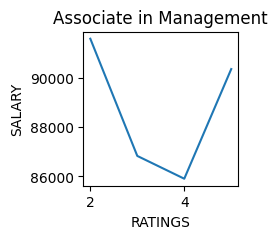

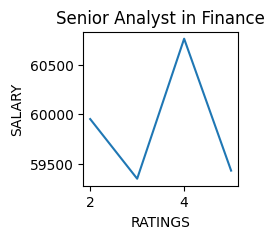

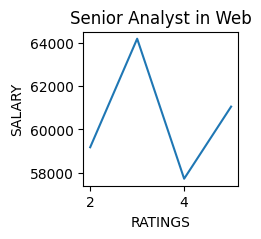

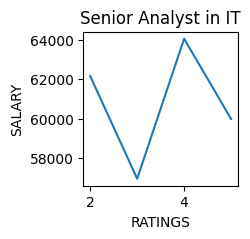

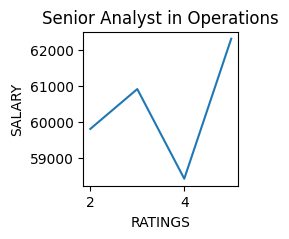

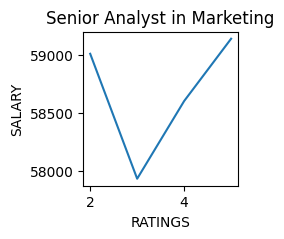

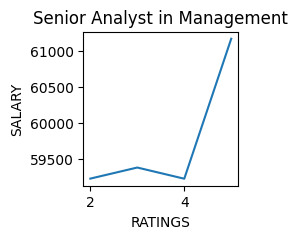

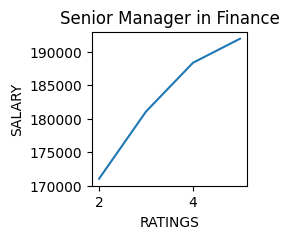

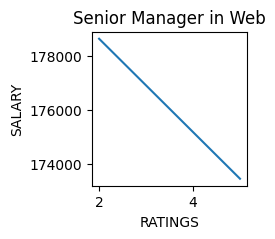

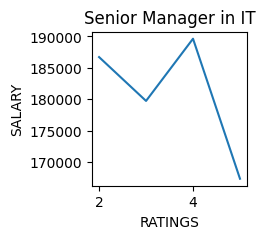

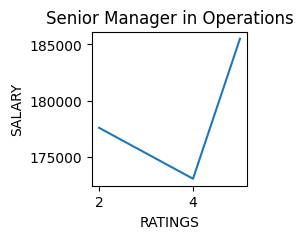

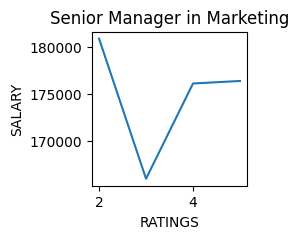

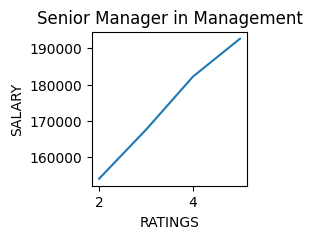

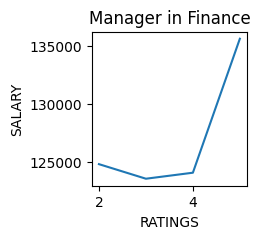

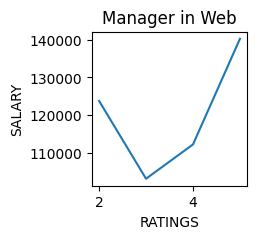

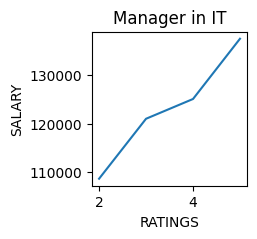

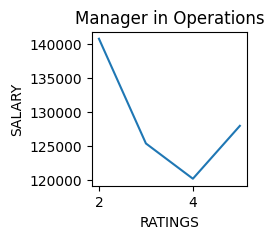

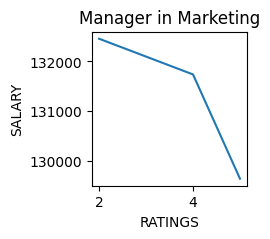

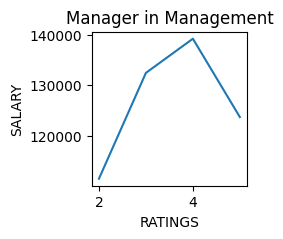

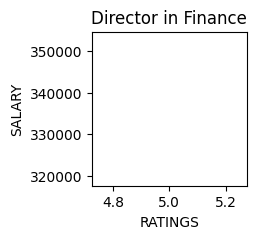

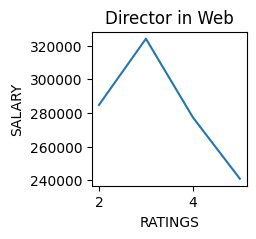

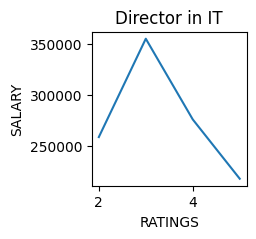

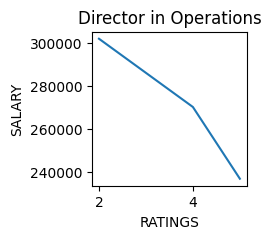

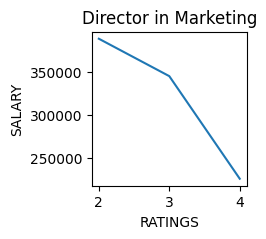

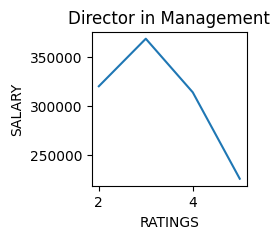

In [19]:
rating_an(designation , unit)

# Data Preprocessing

In [20]:
data["SEX"] = data["SEX"].map({"F":0 ,"M":1})
data.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,0,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,0,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,0,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,0,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,1,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy = "constant" , fill_value=0)
imputer.fit(data.iloc[:,6:12])
data.iloc[:,6:12] = imputer.transform(data.iloc[:,6:12])
data.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,0,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,0,NaN,01-07-2016,Associate,0.0,89207,Web,0.0,13.0,0.0,7
2,OLIVE,ANCY,0,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,0,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,1,11-20-2014,01-07-2016,Analyst,0.0,43161,Operations,27.0,3.0,0.0,3


**Imputed the blank values as 0**

# Feature Engineering

In [22]:
data = data.drop(columns = ["FIRST NAME","LAST NAME","DOJ","CURRENT DATE"])
data.head(2)

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,0,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,0,Associate,0.0,89207,Web,0.0,13.0,0.0,7


In [23]:
X=data.drop(columns=["SALARY"])
y = pd.DataFrame(data["SALARY"])

## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X.loc[: ,["AGE","LEAVES USED","LEAVES REMAINING","RATINGS","PAST EXP"]] = sc.fit_transform(X.loc[:,["AGE","LEAVES USED","LEAVES REMAINING","RATINGS","PAST EXP"]])
X.head()

,SEX,DESIGNATION,AGE,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,0,Analyst,-0.933623,Finance,0.326839,-0.325183,-1.326439,-0.574391
1,0,Associate,-6.192337,Web,-4.820020,1.194835,-3.114674,1.991686
2,0,Analyst,-0.933623,Finance,0.112386,-0.108038,-0.432321,-0.574391
3,0,Analyst,-0.683209,IT,-0.102066,0.109108,-0.432321,-0.574391
4,1,Analyst,-6.192337,Operations,0.970196,-0.976620,-3.114674,0.525356


In [25]:
y.loc[:,["SALARY"]] = sc.fit_transform(y.loc[:,["SALARY"]])
y.head()

,SALARY
0,-0.367960
1,0.842700
2,-0.466007
3,-0.341380
4,-0.406176


## Encoding

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,3])] , remainder='passthrough')
X = ct.fit_transform(X)
print(X[0])

[ 1.          0.          0.          0.          0.          0.
  1.          0.          0.          0.          0.          0.
  0.         -0.93362345  0.32683886 -0.32518341 -1.32643857 -0.57439122]


## Splitting the dataset

In [27]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.2 , random_state =1)

# **Model Development**

## Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , y_train)
y_pred = regressor.predict(X_test)

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
print(f"R2_Square score on Test Set is : {r2_score(y_test,y_pred)}")
print(f"MSE score on Test Set is : {mean_squared_error(y_test,y_pred)}")

R2_Square score on Test Set is : 0.9624548445203507
MSE score on Test Set is : 0.03860121188205972


In [32]:
y_pred2 = regressor.predict(X_train)
print(f"R2_Square score on Train Set is : {r2_score(y_train,y_pred2)}")
print(f"MSE score on Train Set is : {mean_squared_error(y_train,y_pred2)}")

R2_Square score on Train Set is : 0.9521609839226701
MSE score on Train Set is : 0.04750221137116843


## Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor
regressord = DecisionTreeRegressor(random_state = 0)
regressord.fit(X_train, y_train)
y_pred = regressord.predict(X_test)
print(f"R2_Square score on Test Set is : {r2_score(y_test,y_pred)}")
print(f"MSE score on Test Set is : {mean_squared_error(y_test,y_pred)}")

R2_Square score on Test Set is : 0.9226219684005247
MSE score on Test Set is : 0.07955449257380352


In [34]:
y_pred2 = regressord.predict(X_train)
print(f"R2_Square score on Train Set is : {r2_score(y_train,y_pred2)}")
print(f"MSE score on Train Set is : {mean_squared_error(y_train,y_pred2)}")

R2_Square score on Train Set is : 0.9992442255254392
MSE score on Train Set is : 0.000750453537369752


## Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
regressorf = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressorf.fit(X_train, np.ravel(y_train))
y_pred = regressorf.predict(X_test)
print(f"R2_Square score on Test Set is : {r2_score(y_test,y_pred)}")
print(f"MSE score on Test Set is : {mean_squared_error(y_test,y_pred)}")

R2_Square score on Test Set is : 0.9583210096875302
MSE score on Test Set is : 0.04285132170924195


In [37]:
y_pred2 = regressorf.predict(X_train)
print(f"R2_Square score on Train Set is : {r2_score(y_train,y_pred2)}")
print(f"MSE score on Train Set is : {mean_squared_error(y_train,y_pred2)}")

R2_Square score on Train Set is : 0.9907517024178211
MSE score on Train Set is : 0.009183186081043024


## XGBoost Regressor

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
regx = GradientBoostingRegressor()
regx.fit(X_train, np.ravel(y_train))
y_pred = regx.predict(X_test)
print(f"R2_Square score on Test Set is : {r2_score(y_test,y_pred)}")
print(f"MSE score on Test Set is : {mean_squared_error(y_test,y_pred)}")

R2_Square score on Test Set is : 0.9526861294810524
MSE score on Test Set is : 0.048644697765393166


In [39]:
y_pred2 = regx.predict(X_train)
print(f"R2_Square score on Train Set is : {r2_score(y_train,y_pred2)}")
print(f"MSE score on Train Set is : {mean_squared_error(y_train,y_pred2)}")

R2_Square score on Train Set is : 0.9814436069994207
MSE score on Train Set is : 0.01842574899899965


# **Pipeline For Model Deployment**

In [37]:
from sklearn.pipeline import Pipeline

In [38]:
# numerical_features = ["AGE","LEAVES USED","LEAVES REMAINING","RATINGS","PAST EXP"]
numerical_features = [0,2,4,5,6,7]
categorical_features =[1,3]
# categorical_features = ["SEX","DESIGNATION","UNIT"]

num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_features),
        ('cat', cat_pipeline, categorical_features)
    ],
    remainder='passthrough'
)

In [39]:
X=data.drop(columns=["SALARY"])
y = (data["SALARY"])

In [40]:
X = np.array(X)
y = np.array(y)
X[0]

array([0, 'Analyst', 21.0, 'Finance', 24.0, 6.0, 2.0, 0], dtype=object)

In [41]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', regressorf)
])
pipeline.fit(X,y)
y_pred = pipeline.predict(X)
r2_score(y,y_pred)

0.9930349669814049

In [42]:
exp = pipeline.predict([[0,"Analyst",21,"Finance",24,6,0,0]])
exp

array([44624.09])

## Extracting Model

In [43]:
pip install streamlit


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [44]:
import pickle
from random import random as rand

In [45]:
pickle.dump(pipeline,open('salary_pred.pkl','wb'))